# Lab 7 Problema 2

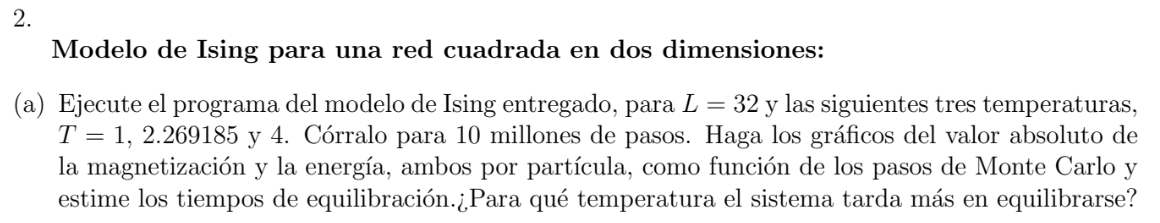

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import Math

In [2]:
# Estableciendo los vecinos de cada sito s
def vecino(s,j):
    global L,N
    if j == 0: #derecha
        if s%L ==L-1:
            return s-L+1
        else:
            return s+1
    elif j==1: #arriba
        if s//L == L-1:
            return s%L
        else:
            return s+L
    elif j==2: #izquierda
        if s%L == 0:
            return s+L-1
        else:
            return s-1
    elif j==3: #abajo
        if s//L == 0:
            return N-L+s
        else:
            return s-L
                
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

In [3]:
def IsingSquare(Nmcs,T,red):
#Nmcs: número total de pasos de Montecarlo
#T: temperatura
#red: entra como configuración inicial
#Unidades donde kb = 1 y J = 1
    global L,N,nn
    beta = 1/T
    J=1
    mag = red.sum() #Magnetizacion inicial - extensiva
    Mag = [mag/N]  #Magnetizacion por particula - intensiva
    ener = 0.
    for s in range(N):
        for j in range(2):
            ener += red[s]*red[nn[s,j]] # Solo se multiplica el de la derecha y arriba para evitar contar dobles interacciones
    ener = -J*ener # Energía inicial
    Energy = [ener/N] #Energía por partícula
    expon = {4:np.exp(-J*beta*4),8:np.exp(-J*beta*8)}
    for mcs in range(Nmcs):
        sr = np.random.randint(N) #escogo un sitio al azar
        dm = -2*red[sr] #posible cambio en mag
        de = 0
        for j in range(4):
            de += red[nn[sr,j]]
        de = -dm*de #posible cambio en ener (sin inclurir J)
    #Cambio de Metropolis
        if de <= 0 or np.random.random() < expon[de]:        
            ener += J*de
            mag += dm
            red[sr] = -red[sr]
        Mag.append(mag/N) # Magnetización por partícula
        Energy.append(ener/N) # Energía por partícula
    return np.array(Mag),np.array(Energy)

In [4]:
global L,N,nn
L=32
N=L*L
nn = np.zeros((N,4),dtype='uint32')
boundaries()
Nmcs = 10000000

#Caso T1= 1
T1 = 1. 
red=np.ones(N)
startTime  = time.process_time()
MagT1, EnergyT1 = IsingSquare(Nmcs,T1,red)
endTime  = time.process_time()
print('T1 = {:.2f}, Tiempo de cómputo = {:.2f} segundos'.format(T1, endTime-startTime))

#Caso T2=Tc
T2 = 2.26918531421
red=np.ones(N)
startTime  = time.process_time()
MagT2, EnergyT2 = IsingSquare(Nmcs,T2,red)
endTime  = time.process_time()
print('T2 = {:.2f}, Tiempo de cómputo = {:.2f} segundos'.format(T2, endTime-startTime))

#Caso T3= 4
T3 = 4.
red=np.ones(N)
startTime  = time.process_time()
MagT3, EnergyT3 = IsingSquare(Nmcs,T3,red)
endTime  = time.process_time()
print('T3 = {:.2f}, Tiempo de cómputo = {:.2f} segundos'.format(T3,endTime-startTime))

T1 = 1.00, Tiempo de cómputo = 52.54 segundos
T2 = 2.27, Tiempo de cómputo = 52.24 segundos
T3 = 4.00, Tiempo de cómputo = 51.68 segundos


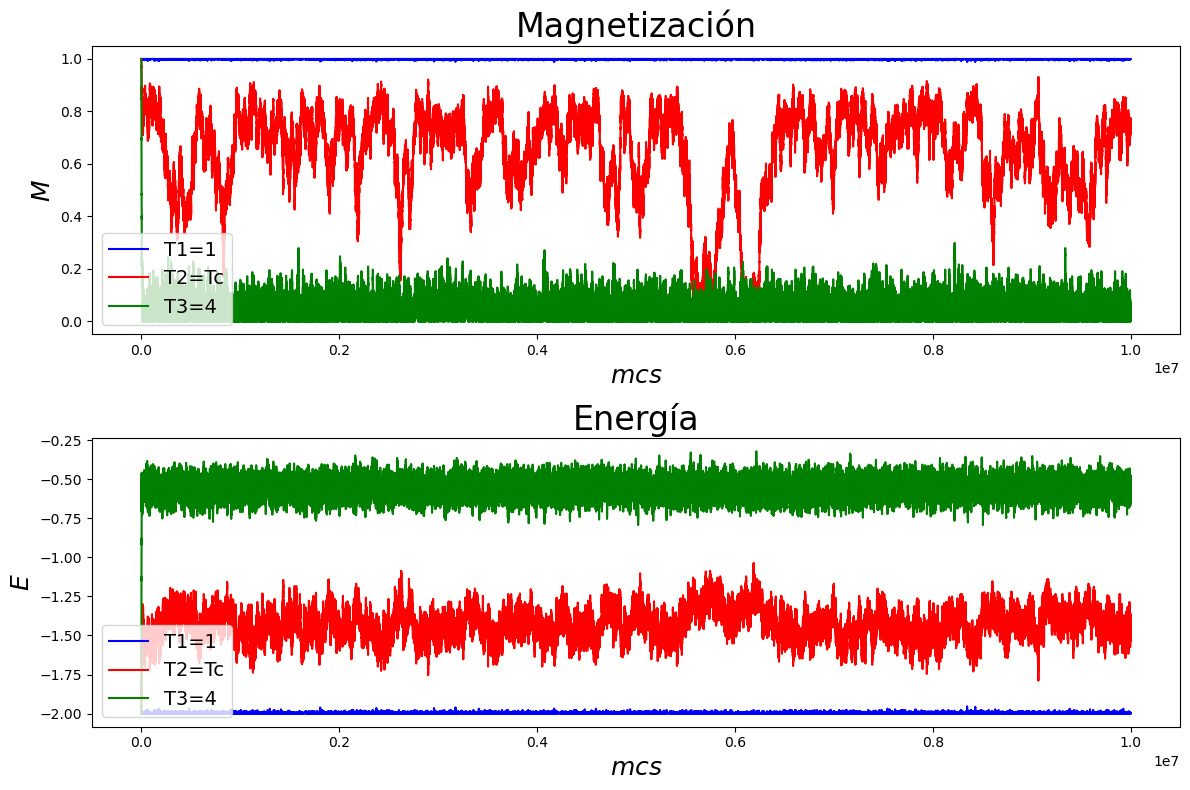

In [5]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(np.abs(MagT1),'b-',label = 'T1=1')
ax1.plot(np.abs(MagT2),'r-',label = 'T2=Tc')
ax1.plot(np.abs(MagT3),'g-',label = 'T3=4')
ax1.legend(loc = 'lower left', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$M$',fontsize = 18)
ax1.set_title('Magnetización',fontsize = 24)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(EnergyT1,'b-',label = 'T1=1')
ax2.plot(EnergyT2,'r-',label = 'T2=Tc')
ax2.plot(EnergyT3,'g-',label = 'T3=4')
ax2.legend(loc = 'lower left', fontsize = 14)
ax2.set_xlabel(r'$mcs$',fontsize = 18)
ax2.set_ylabel(r'$E$',fontsize = 18)
ax2.set_title('Energía',fontsize = 24)

fig.tight_layout()
plt.savefig('resultado2a.png')
plt.show()

### Discusión: 

### Arriba de la temperatura de curie hay mayor energía como era de eseperarse y también la magnetización tiende a 0, pero los datos aparecen con mucho ruido debido a la naturaleza del método de montecarlo.

### También podemos decir que debajo de la temperatura existe una magnetización bien definida y que no es difícil llegar a ella con el método de montecarlo ya que a una temepratura menor será más probable encontrar el estado de equilibrio aunque tome más tiempo, por otro lado la magnetización en la temperatura de curie es completamente inestable.

### En ambas gráficas tarda más en estabilizarse la temperatura correspondeinte a la temperatura de Curie. La más estable es la de temperatura más baja (línea azul) y le sigue la temperatura más alta (línea verde) ya que aunque esta úlitma fluctúa, no lo hace de manera tan irregular como la línea roja.

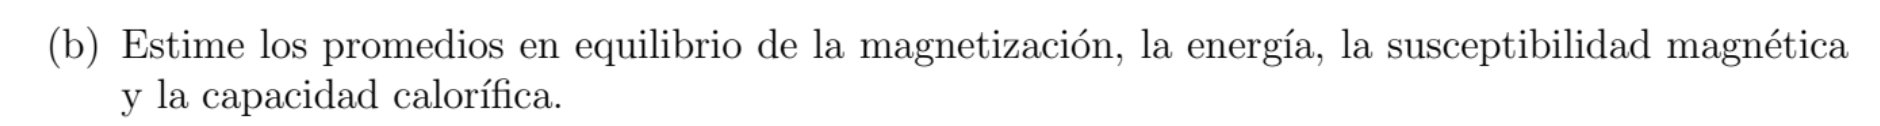

### Por partícula

In [6]:
smagT1 = np.var(N*MagT1)/(T1*N)
smagT2 = np.var(N*MagT2)/(T2*N)
smagT3 = np.var(N*MagT3)/(T3*N)

In [7]:
cap_T1 = np.var(N*EnergyT1)/((T1**2)*N)
cap_T2 = np.var(N*EnergyT2)/((T2**2)*N)
cap_T3 = np.var(N*EnergyT3)/((T3**2)*N)

In [8]:
display(Math(f'E_1 = {round(EnergyT1[1000000:].mean(),2)}, E_2 = {round(EnergyT2[1000000:].mean(),2)},E_3 = {round(EnergyT3[1000000:].mean(),2)}'))
display(Math(f'M_1 = {round(np.abs(MagT1)[1000000:].mean(),2)}, M_2 = {round(np.abs(MagT2)[1000000:].mean(),2)},M_3 = {round(np.abs(MagT3)[1000000:].mean(),2)}'))
display(Math(f'C_1 = {round(cap_T1,4)}, C_2 = {round(cap_T2,4)}, C_3 = {round(cap_T3,4)}'))
display(Math(f'\chi_1 = {round(smagT1,4)}, \chi_2 = {round(smagT2,4)}, \chi_3 = {round(smagT3,4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

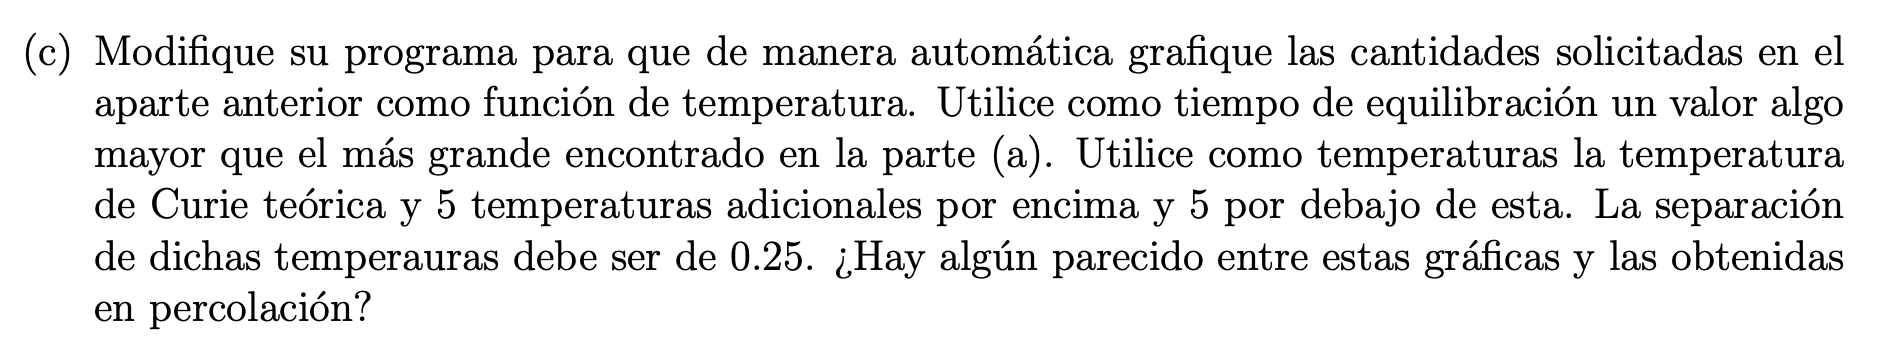

In [9]:
#Definimos una función que grafica Magnetización, energía, susceptibilidad magnética y capacidad calorífica en función de la temperatura

def graficas(M, E, Smag, Capcal, T):
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(4, 1, 1)
    ax1.plot(T, np.abs(M), 'b-')
    plt.axvline(x=2.2691, linestyle="dashed")
    ax1.set_xlabel('Temperatura',fontsize = 18)
    ax1.set_ylabel('Magnetización',fontsize = 18)
    ax1.set_title('Magnetización vs T',fontsize = 24)

    ax2 = fig.add_subplot(4, 1, 2)
    ax2.plot(T, E,'r-')
    plt.axvline(x=2.2691, linestyle="dashed")
    ax2.set_xlabel('Temperatura',fontsize = 18)
    ax2.set_ylabel('Energía',fontsize = 18)
    ax2.set_title('Energía vs T',fontsize = 24)
    
    ax3 = fig.add_subplot(4, 1, 3)
    ax3.plot(T, Smag,'r-')
    plt.axvline(x=2.2691, linestyle="dashed")
    ax3.set_xlabel('Temperatura',fontsize = 18)
    ax3.set_ylabel('Susceptibilidad magnética',fontsize = 18)
    ax3.set_title('Susceptibilidad magnética vs T',fontsize = 24)
    
    ax4 = fig.add_subplot(4, 1, 4)
    ax4.plot(T, Capcal,'r-')
    plt.axvline(x=2.2691, linestyle="dashed")
    ax4.set_xlabel('Temperatura',fontsize = 18)
    ax4.set_ylabel('Capacidad calorífica',fontsize = 18)
    ax4.set_title('Capacidad calorífica vs T',fontsize = 24)

    fig.tight_layout()
    plt.show()

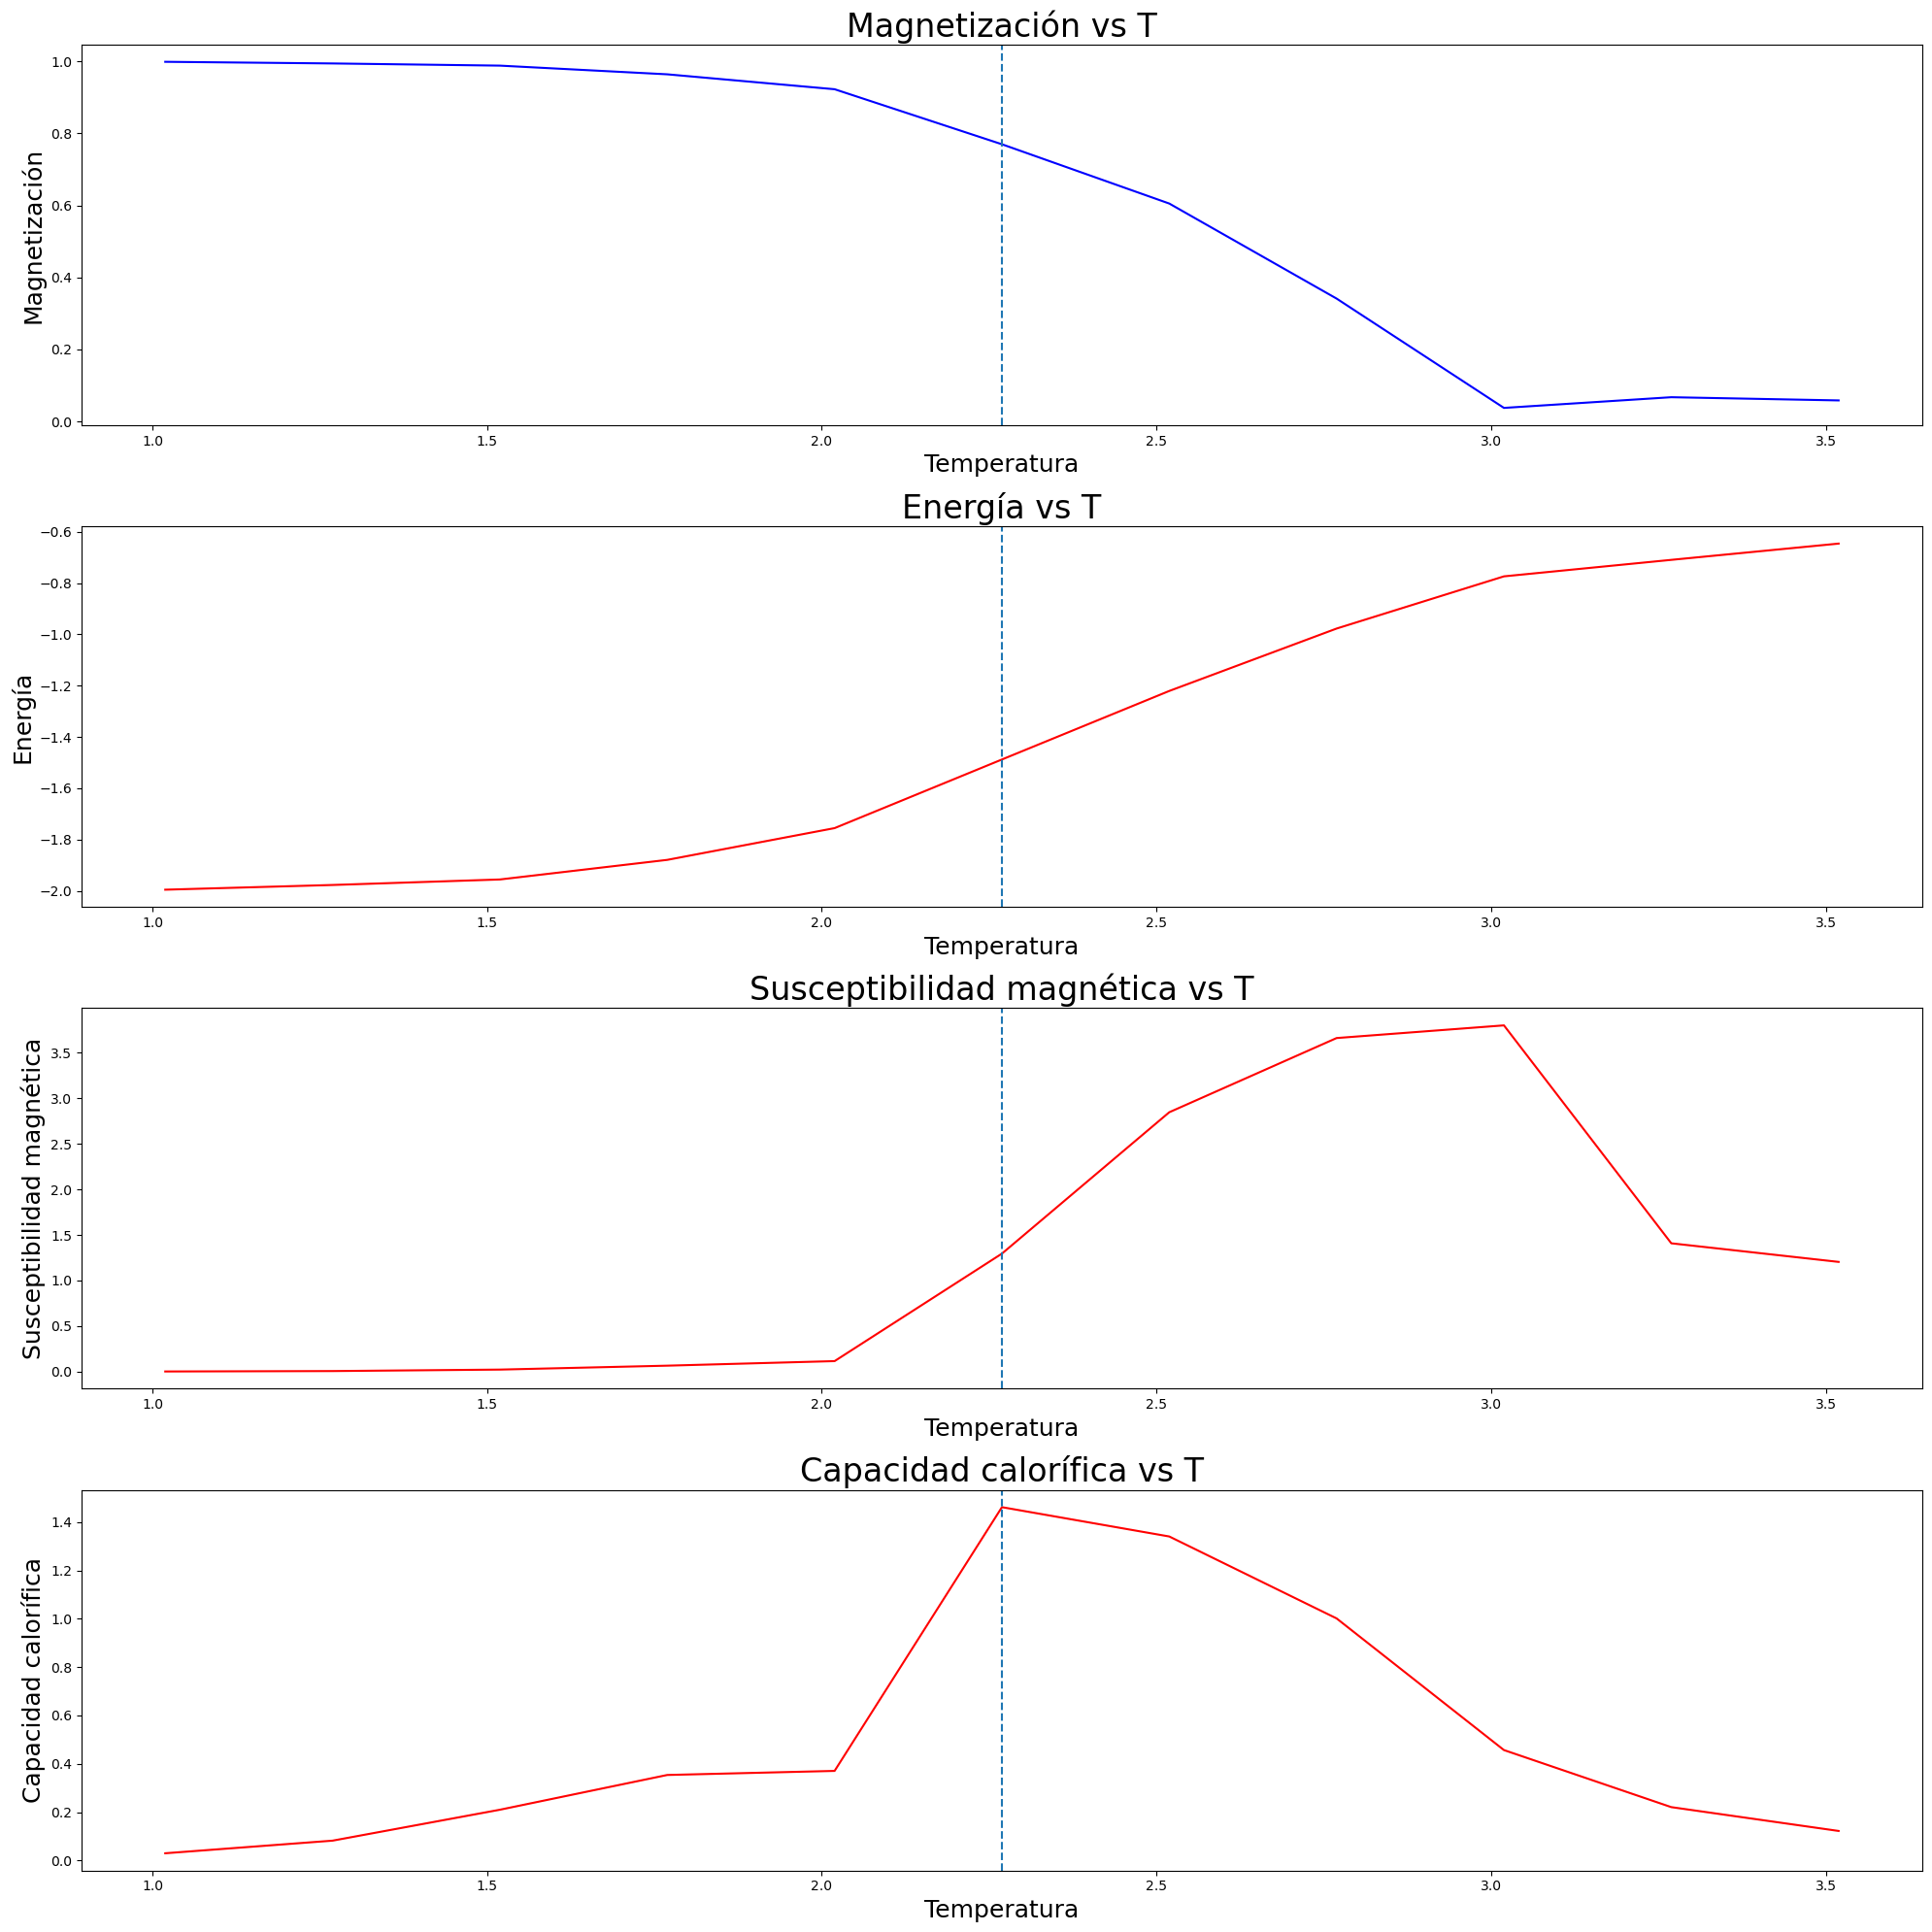

In [10]:
global L,N,nn
L=32
N=L*L
nn = np.zeros((N,4),dtype='uint32')
boundaries()
Nmcs = 20000
T = [1.0191, 1.2691, 1.5191, 1.7691, 2.0191, 2.2691, 2.5191, 2.7691, 3.0191, 3.2691, 3.5191] #Temp de Curie: 2.2691
red = np.ones(N)
Mag_prom = []
E_prom = []
smag = []
capcal = []

startTime  = time.process_time()
for x in T:
    MagT, EnergyT = IsingSquare(Nmcs,x,red)
    Mag_prom.append(MagT[10000:].mean())
    E_prom.append(EnergyT[10000:].mean())
    smag.append(np.var(N*MagT)/(x*N))
    capcal.append(np.var(N*EnergyT)/((x**2)*N))
    
graficas(Mag_prom, E_prom, smag, capcal, T)

endTime  = time.process_time()

### Discusión: En la gráfica de la magnetización se puede observar que la magnetización se mantiene constante hasta antes de la temperatura de Curie, después de ese punto comienza a decrecer rápidamente ya que al aumentar la temperatura el material pierde sus propiedades magnéticas. De manera inversa, la energía comienza a a umentar después de ese punto. Esto es debido a que la magnetización se da a bajas energías donde los spines están ordenados y el aumento de energía desordena el sistema haciendo que se pierda la magentización.

### En la gráfica de capacidad calorífica, se puede observar que la gráfica alcanza su máximo en la temperatura de Curie.

### Existe una analogía entre el parámetro de percolación (fracción de ocupación después de la cuál es seguro que un sistema percole) y la temperatura de curie (temperatura después de la cuál es seguro que se perderán las propiedades magnéticas) por lo que las gráficas se comportan de manera similar.